In [113]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

In [114]:
# Đọc file:
data = pd.read_csv('data.csv')
data

,Screen Size,Weight,Brightness
0,10.006692,29.313384,19.825988
1,10.081624,29.463248,19.993238
2,10.072873,29.445746,19.973641
3,9.954496,29.208992,19.710221
4,9.994093,29.288185,19.797988
...,...,...,...
995,10.034021,29.368042,19.886842
996,10.068130,29.436260,19.963027
997,9.969032,29.238063,19.742399
998,9.939579,29.179159,19.677249


In [123]:
scrsize = data['Screen Size']
weight = data['Weight']
bright = data['Brightness']

In [158]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
        
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();
        

    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        else:
            print('Dữ liệu không tuân theo luật phân phối chuẩn')
        print('-'*50)
    
    def kolmo(self):
        print('Kiểm định Kolmogorov:')
        stat, p = stats.kstest(self.data, 'norm')
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        else:
            print('Dữ liệu không tuân theo luật phân phối chuẩn')
        print('-'*50)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


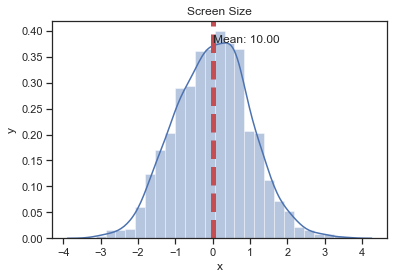

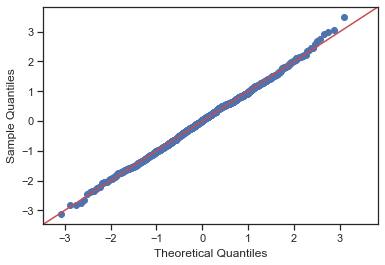

      Screen Size
0.25    -0.703580
0.50     0.033880
0.75     0.650829
--------------------------------------------------
Kiểm định Shapori:
stat=0.999, p=0.732
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Kolmogorov:
stat=0.025, p=0.551
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [159]:
ScrSize = thongke(scrsize)
ScrSize.hist()
ScrSize.qq()
ScrSize.shapiro()
ScrSize.kolmo()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


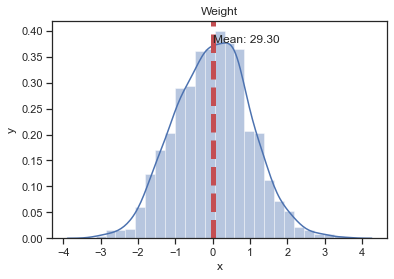

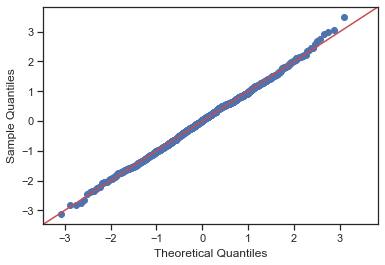

        Weight
0.25 -0.703580
0.50  0.033880
0.75  0.650829
--------------------------------------------------
Kiểm định Shapori:
stat=0.999, p=0.732
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Kolmogorov:
stat=0.025, p=0.551
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [160]:
Weight = thongke(weight)
Weight.hist()
Weight.qq()
Weight.shapiro()
Weight.kolmo()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


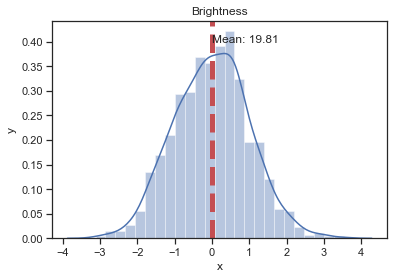

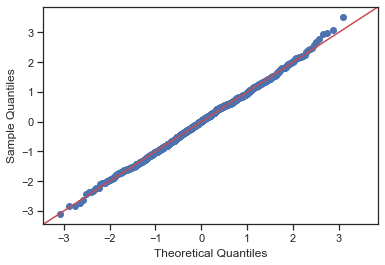

      Brightness
0.25   -0.704766
0.50    0.031442
0.75    0.649380
--------------------------------------------------
Kiểm định Shapori:
stat=0.999, p=0.699
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------
Kiểm định Kolmogorov:
stat=0.024, p=0.591
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [161]:
Brightness = thongke(bright)
Brightness.hist()
Brightness.qq()
Brightness.shapiro()
Brightness.kolmo()

In [162]:
# Phương sai mỗi nhóm:
print('Phương sai của: [Screen Size    Weight   Brightness]')
print([np.var(x, ddof=1) for x in [scrsize, weight, bright]])
print('-'*50)

# Kiểm định Bartlett - Kiểm định tính đồng nhất của các phương sai:
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(scrsize, weight, bright)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm bằng nhau.')
else:
    print('Phương sai các nhóm không bằng nhau.')
print('-'*50)

# Kiểm định Levene - Kiểm tra bình đẳng các phương sai:
from scipy.stats import levene
print('Kiểm định Leneve:')
levene_test = levene(scrsize, weight, bright)
print(levene_test)
levenevalue,pvalue=levene_test
if (levenevalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm bằng nhau.')
else:
    print('Phương sai các nhóm không bằng nhau.')

Phương sai của: [Screen Size    Weight   Brightness]
[0.0023822143131609504, 0.009528857252643812, 0.011764134584511459]
--------------------------------------------------
Kiểm định Bartlett:
BartlettResult(statistic=609.1564291909685, pvalue=5.2888602698504484e-133)
Phương sai các nhóm bằng nhau.
--------------------------------------------------
Kiểm định Leneve:
LeveneResult(statistic=232.0294368715241, pvalue=2.0437017282021978e-94)
Phương sai các nhóm bằng nhau.
